Stanford open policing project

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()
os.chdir('C:\\Users\\BAROTJE1\\OneDrive - Novartis Pharma AG\\Desktop\\Data Science Projects')

In [ ]:
df = pd.read_csv('police_project.csv')

In [ ]:
df.head(2)

In [ ]:
# Checking the type of data in our input data frame
df.info()

In [ ]:
# Dropping the column which is empty
df.drop('county_name',axis=1,inplace=True)

In [13]:
# let's make a copy of the original data frame
df_1 = df.copy()

In [14]:
# Let's check the first two rows details
df_1.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [16]:
# we will drop stop date 
df_1.drop('stop_date',axis=1,inplace=True)

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_time           91741 non-null  object 
 1   driver_gender       86406 non-null  object 
 2   driver_age_raw      86414 non-null  float64
 3   driver_age          86120 non-null  float64
 4   driver_race         86408 non-null  object 
 5   violation_raw       86408 non-null  object 
 6   violation           86408 non-null  object 
 7   search_conducted    91741 non-null  bool   
 8   search_type         3196 non-null   object 
 9   stop_outcome        86408 non-null  object 
 10  is_arrested         86408 non-null  object 
 11  stop_duration       86408 non-null  object 
 12  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 7.9+ MB


In [20]:
# we will only keep driver gender and violation in the data set
df_1.drop(df_1.iloc[[],[0,2,3,4,5,7,8,9,10,11,12]],axis=1,inplace=True)

In [21]:
df_1.head(3)

,driver_gender,violation
0,M,Speeding
1,M,Speeding
2,M,Speeding


In [25]:
# let's perform the value count
df_1.driver_gender.value_counts()

driver_gender
M    62895
F    23511
Name: count, dtype: int64

In [27]:
# normalize gives the percentage
df_1.driver_gender.value_counts(normalize = True)

driver_gender
M    0.727901
F    0.272099
Name: proportion, dtype: float64

In [29]:
# Let's perform the value count for violations
df_1.violation.value_counts(normalize=True)

violation
Speeding               0.560862
Moving violation       0.187760
Equipment              0.127534
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: proportion, dtype: float64

In [79]:
# let's pull the speeding data for gender
df1 = df_1[df_1.violation == 'Speeding'].driver_gender.value_counts()


([<matplotlib.patches.Wedge at 0x1879d7bf800>,
 [Text(-0.5909452156326779, 0.9277843241405019, 'M'),
  Text(0.5909452156326782, -0.9277843241405018, 'F')],
 [Text(-0.32233375398146064, 0.50606417680391, '68.1%'),
  Text(0.3223337539814608, -0.50606417680391, '31.9%')])

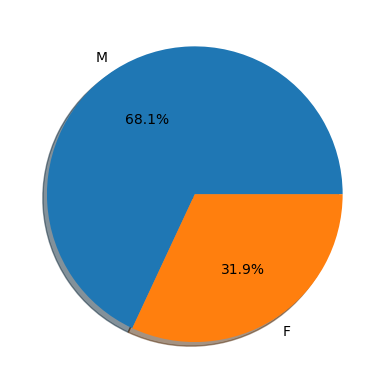

In [80]:
#let's create a pie chart
plt.pie(df_1[df_1.violation == 'Speeding'].driver_gender.value_counts(), labels = df_1[df_1.violation == 'Speeding'].driver_gender.value_counts().index, autopct = '%1.1f%%', shadow=True)

In [36]:
# let's pull the speeding data for gender and calculate the percentage
df_1[df_1.violation == 'Speeding'].driver_gender.value_counts(normalize = True)

driver_gender
M    0.680527
F    0.319473
Name: proportion, dtype: float64

In [38]:
# Let's filter all the violation for Male
df_1[df_1.driver_gender == 'M'].violation.value_counts()

violation
Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: count, dtype: int64

In [39]:
# Let's Calculate the percentage of the violation for Male
df_1[df_1.driver_gender == 'M'].violation.value_counts(normalize = True)

violation
Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: proportion, dtype: float64

In [40]:
# Let's Check the same deatils for Female
df_1[df_1.driver_gender == 'F'].violation.value_counts()

violation
Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: count, dtype: int64

In [41]:
# Let's Calculate the percentage of the violation for Male
df_1[df_1.driver_gender == 'F'].violation.value_counts(normalize = True)

violation
Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: proportion, dtype: float64

In [42]:
# Let's create another copy which contains driver's gender and search conducted
df2 = df.copy()

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


In [44]:
# we will filter out 2nd and 8th index
df2.drop(df.iloc[[],[0,1,3,4,5,6,7,9,10,11,12,13]], axis = 1, inplace = True)

In [45]:
# Let's check the new data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   driver_gender     86406 non-null  object
 1   search_conducted  91741 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 806.4+ KB


In [46]:
# Let's check the count of driver gender and search conducted

df2.driver_gender.value_counts()

driver_gender
M    62895
F    23511
Name: count, dtype: int64

In [47]:
df2.search_conducted.value_counts()

search_conducted
False    88545
True      3196
Name: count, dtype: int64

In [50]:
# let's check the data based on the gender where search was not carried out
df2[df2.search_conducted == False].driver_gender.value_counts()

driver_gender
M    60170
F    23040
Name: count, dtype: int64

In [51]:
# let's check the data based on the gender where search was carried out
df2[df2.search_conducted == True].driver_gender.value_counts()

driver_gender
M    2725
F     471
Name: count, dtype: int64

In [52]:
# Let's create copy 3 
df3 = df.copy()

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


In [55]:
# we will only keep index 7 and 8
df3.drop(df3.iloc[[],[0,1,2,3,4,5,6,9,10,11,12,13]], axis = 1, inplace = True)

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   violation         86408 non-null  object
 1   search_conducted  91741 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 806.4+ KB


In [58]:
# We want to check if search is conducted for those vehicle how much is the violation count
df3[df3.search_conducted == True].violation.value_counts()

violation
Speeding               957
Moving violation       895
Equipment              704
Registration/plates    334
Other                  210
Seat belt               96
Name: count, dtype: int64

In [59]:
# let's check the percentage 
df3[df3.search_conducted == True].violation.value_counts(normalize = True)

violation
Speeding               0.299437
Moving violation       0.280038
Equipment              0.220275
Registration/plates    0.104506
Other                  0.065707
Seat belt              0.030038
Name: proportion, dtype: float64

In [61]:
# let's create another copy and keep only 2,7 and 8 index
df4 = df.copy()

In [63]:
df4.drop(df4.iloc[[],[0,1,3,4,5,6,9,10,11,12,13]],axis = 1, inplace = True)

In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   driver_gender     86406 non-null  object
 1   violation         86408 non-null  object
 2   search_conducted  91741 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 1.5+ MB


In [66]:
df4[df4.search_conducted == True].violation.value_counts()

violation
Speeding               957
Moving violation       895
Equipment              704
Registration/plates    334
Other                  210
Seat belt               96
Name: count, dtype: int64

In [67]:
# let's group by driver's gender, violation and count the search conducted.

df4.groupby(['driver_gender','violation']).search_conducted.value_counts()

driver_gender  violation            search_conducted
F              Equipment            False                2381
                                    True                  106
               Moving violation     False                3088
                                    True                  116
               Other                False                 651
                                    True                   39
               Registration/plates  False                 946
                                    True                   67
               Seat belt            False                 627
                                    True                    8
               Speeding             False               15347
                                    True                  135
M              Equipment            False                7935
                                    True                  598
               Moving violation     False               12241
                 

In [68]:
# let's group by violation, search conducted and calculate as per gender

df4.groupby(['violation','search_conducted']).driver_gender.value_counts()

violation            search_conducted  driver_gender
Equipment            False             M                 7935
                                       F                 2381
                     True              M                  598
                                       F                  106
Moving violation     False             M                12241
                                       F                 3088
                     True              M                  779
                                       F                  116
Other                False             M                 3456
                                       F                  651
                     True              M                  171
                                       F                   39
Registration/plates  False             M                 2152
                                       F                  946
                     True              M                  267
                 